# Project 2 Clustering

## Data check

In [1]:
# Load data

import numpy as np
np.random.seed(42)
import random
random.seed(42)
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics',
'comp.sys.mac.hardware', 'comp.os.ms-windows.misc',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories,
shuffle=True, random_state=42)

In [2]:
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [3]:
dataset.target_names

['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey']

In [4]:
# making data binary label -> Ground truth
def get_labels(train_dataset):
    labels = []
    new_name = ['Computer Technology','Recreational Activity']

    for label in train_dataset.target:
        name = train_dataset.target_names[label]
        if name.startswith('comp'):
            labels.append(0)
        elif name.startswith('rec'):
            labels.append(1)
        else:
            print('Wrong type!')
    
    return labels, new_name

label, label_name = get_labels(dataset)

#check the new binary label
print(np.unique(label))
print(label_name)

[0 1]
['Computer Technology', 'Recreational Activity']


## Question 1:
Report the dimensions of the TF-IDF matrix you get

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vec = CountVectorizer(min_df=3,stop_words='english')
data_vec = vec.fit_transform(dataset.data)

tfidf = TfidfTransformer()
data_tfidf = tfidf.fit_transform(data_vec)

In [6]:
# show time
print(data_tfidf.shape)

(7882, 27768)


## Question 2:
Report the contingency table of your clustering result.

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, max_iter=1000, n_init=30, random_state=0)
km.fit(data_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [8]:
from sklearn.metrics.cluster import contingency_matrix

#true_label = [int(x / 4) for x in dataset.target]

print(contingency_matrix(label, km.labels_))

[[   4 3899]
 [1718 2261]]


## Question 3:
Report the 5 measures above for the K-means clustering results you get.

In [9]:
from sklearn.metrics.cluster import homogeneity_score,\
                                    completeness_score,\
                                    v_measure_score,\
                                    adjusted_rand_score,\
                                    adjusted_mutual_info_score

In [10]:
print("The homogeneity score is:", 
      homogeneity_score(label, km.labels_))
print("The completeness_score score is:", 
      completeness_score(label, km.labels_))
print("The V-measure score is:", 
      v_measure_score(label, km.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(label, km.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(label, km.labels_))

The homogeneity score is: 0.2535958928926043
The completeness_score score is: 0.334815748824373
The V-measure score is: 0.28860033608397917
The adjusted Rand Index score is: 0.18076179588914554
The adjusted mutual information score is: 0.25352755133060884


## Question 4:
Report the plot of the percent of variance the top r principle components can retain v.s. r, for r = 1 to 1000

In [11]:
from sklearn.decomposition import TruncatedSVD

r = 1000
svd = TruncatedSVD(1000)
svd.fit(data_tfidf)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
       random_state=None, tol=0.0)

Text(0,0.5,'Percent of the Variance')

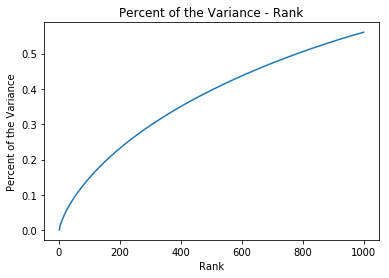

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

ratio = svd.explained_variance_ratio_.cumsum()
x = np.array(range(1, 1001))

plt.plot(x, ratio)
plt.title('Percent of the Variance - Rank')
plt.xlabel('Rank')
plt.ylabel('Percent of the Variance')

## Question 5:
Let r be the dimension that we want to reduce the data to (i.e. n_components).

Try r = 1,2,3,5,10,20,50,100,300, and plot the 5 measure scores v.s. r for both SVD and NMF.

Report the best r choice for SVD and NMF respectively.

Note: what is “best” after all? What if some measures contradict with each other? Here you are faced with this challenge that you need to decide which measure you value the most, and design your own standard of “best”. Please explain your standard and justify it.

### SVD

In [13]:
# process data using svd
ranks = [1, 2, 3, 5, 10, 20, 50, 100, 300]
hs,cs,vs,ars,amis = [],[],[],[],[]
for rank in ranks:
    svd = TruncatedSVD(n_components=rank)
    data_svd_r = svd.fit_transform(data_tfidf)
    
    # apply k-means
    km.fit(data_svd_r)
    
    # calculate 5 scores
    hs.append(homogeneity_score(label,km.labels_))
    cs.append(completeness_score(label,km.labels_))
    vs.append(v_measure_score(label,km.labels_))
    ars.append(adjusted_rand_score(label,km.labels_))
    amis.append(adjusted_mutual_info_score(label,km.labels_))

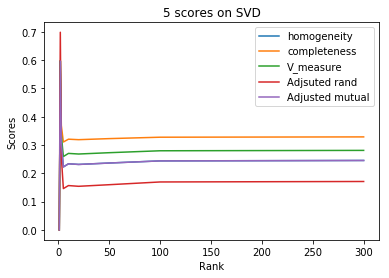

In [14]:
# plot 
plt.plot(ranks, hs)
plt.plot(ranks, cs)
plt.plot(ranks, vs)
plt.plot(ranks, ars)
plt.plot(ranks, amis)
plt.title('5 scores on SVD')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['homogeneity','completeness',
                     'V_measure','Adjsuted rand','Adjusted mutual'])

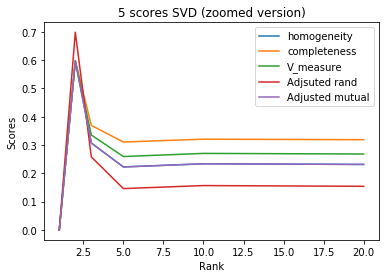

In [15]:
# plot within rank = 50
plt.plot(ranks[:6], hs[:6])
plt.plot(ranks[:6], cs[:6])
plt.plot(ranks[:6], vs[:6])
plt.plot(ranks[:6], ars[:6])
plt.plot(ranks[:6], amis[:6])
plt.title('5 scores SVD (zoomed version)')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['homogeneity','completeness',
                     'V_measure','Adjsuted rand','Adjusted mutual'])

#### The best rank for SVD seems to be 2.

### NMF

In [16]:
# process data using nmf
from sklearn.decomposition import NMF

ranks = [1, 2, 3, 5, 10, 20, 50, 100, 300]
hs_nmf,cs_nmf,vs_nmf,ars_nmf,amis_nmf = [],[],[],[],[]
for rank in ranks:
    nmf = NMF(n_components=rank)
    data_nmf_r = nmf.fit_transform(data_tfidf)
    
    # apply k-means
    km.fit(data_nmf_r)
    
    # calculate 5 scores
    hs_nmf.append(homogeneity_score(label,km.labels_))
    cs_nmf.append(completeness_score(label,km.labels_))
    vs_nmf.append(v_measure_score(label,km.labels_))
    ars_nmf.append(adjusted_rand_score(label,km.labels_))
    amis_nmf.append(adjusted_mutual_info_score(label,km.labels_))

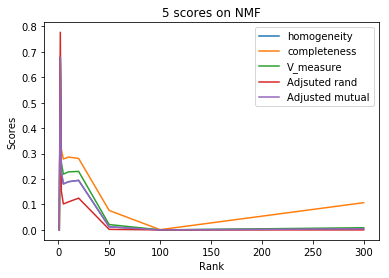

In [17]:
# plot 
plt.plot(ranks, hs_nmf)
plt.plot(ranks, cs_nmf)
plt.plot(ranks, vs_nmf)
plt.plot(ranks, ars_nmf)
plt.plot(ranks, amis_nmf)
plt.title('5 scores on NMF')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['homogeneity','completeness',
                     'V_measure','Adjsuted rand','Adjusted mutual'])

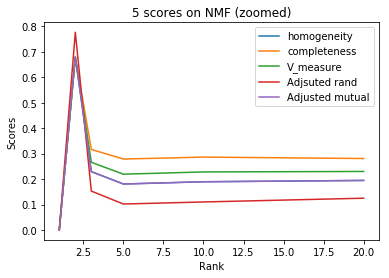

In [18]:
# plot within 20
plt.plot(ranks[:6], hs_nmf[:6])
plt.plot(ranks[:6], cs_nmf[:6])
plt.plot(ranks[:6], vs_nmf[:6])
plt.plot(ranks[:6], ars_nmf[:6])
plt.plot(ranks[:6], amis_nmf[:6])
plt.title('5 scores on NMF (zoomed)')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['homogeneity','completeness',
                     'V_measure','Adjsuted rand','Adjusted mutual'])

#### The best rank for NMF seems to be 2 too.

## Question 6:
How do you explain the non-monotonic behavior of the measures as r increases?

## Question 7:
Visualize the clustering results for:
- SVD with its best r
- NMF with its best r

In [54]:
# reduce to 2-D using SVD
svd = TruncatedSVD(n_components=2)
data_svd_2 = svd.fit_transform(data_tfidf)
# reduce to 2-D using NMF
nmf = NMF(n_components=2)
data_nmf_2 = nmf.fit_transform(data_tfidf)

### SVD

The homogeneity score is: 0.5944367081095727
The completeness_score score is: 0.5955941622701528
The V-measure score is: 0.595014872305249
The adjusted Rand Index score is: 0.6956045991371033
The adjusted mutual information score is: 0.594399578651009


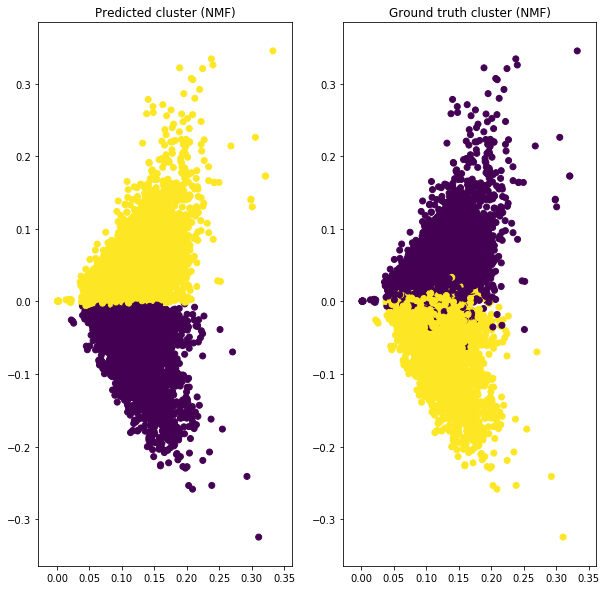

In [55]:
# visulizing svd
plt.figure(figsize=(10, 10))

#X_svd = km.fit_transform(data_svd_2)
km.fit(data_svd_2)

plt.subplot(121)
plt.scatter(data_svd_2[:, 0], data_svd_2[:, 1], c=km.labels_)
plt.title("Predicted cluster (NMF)")

plt.subplot(122)
plt.scatter(data_svd_2[:, 0], data_svd_2[:, 1], c=label)
plt.title("Ground truth cluster (NMF)")

print("The homogeneity score is:", 
      homogeneity_score(label, km.labels_))
print("The completeness_score score is:", 
      completeness_score(label, km.labels_))
print("The V-measure score is:", 
      v_measure_score(label, km.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(label, km.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(label, km.labels_))

### NMF

The homogeneity score is: 0.6790483562300399
The completeness_score score is: 0.680131609210451
The V-measure score is: 0.6795895510492934
The adjusted Rand Index score is: 0.7770177788377391
The adjusted mutual information score is: 0.6790189730005426


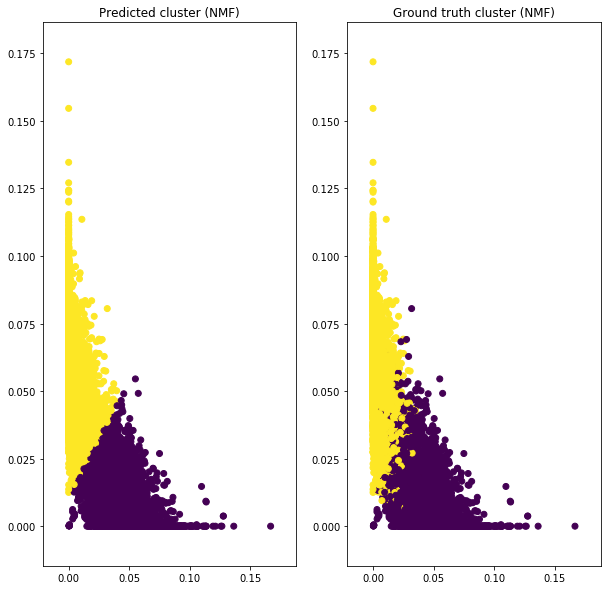

In [56]:
plt.figure(figsize=(10, 10))

#X_nmf = km.fit_transform(data_nmf_2)
km.fit(data_nmf_2)

plt.subplot(121)
plt.scatter(data_nmf_2[:, 0], data_nmf_2[:, 1], c=km.labels_)
plt.title("Predicted cluster (NMF)")

plt.subplot(122)
plt.scatter(data_nmf_2[:, 0], data_nmf_2[:, 1], c=label)
plt.title("Ground truth cluster (NMF)")

print("The homogeneity score is:", 
      homogeneity_score(label, km.labels_))
print("The completeness_score score is:", 
      completeness_score(label, km.labels_))
print("The V-measure score is:", 
      v_measure_score(label, km.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(label, km.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(label, km.labels_))

## Question 8 + 10:
- Visulaize the **transformed** data as in part (a).
- Report the new clustering measures (except for the contingency matrix) for the clustering results of the transformed data.

### Scaling SVD

The homogeneity score is: 0.2351261323302027
The completeness_score score is: 0.26363898332545466
The V-measure score is: 0.24856756230552882
The adjusted Rand Index score is: 0.2543693093629073
The adjusted mutual information score is: 0.23505610486870857


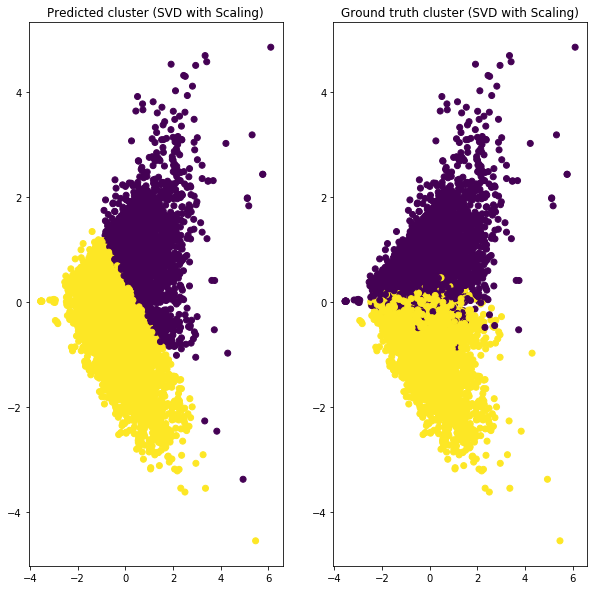

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm_svd = scaler.fit_transform(data_svd_2)
km.fit(X_norm_svd)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(X_norm_svd[:, 0], X_norm_svd[:, 1], c=km.labels_)
plt.title("Predicted cluster (SVD with Scaling)")

plt.subplot(122)
plt.scatter(X_norm_svd[:, 0], X_norm_svd[:, 1], c=label)
plt.title("Ground truth cluster (SVD with Scaling)")

print("The homogeneity score is:", 
      homogeneity_score(label, km.labels_))
print("The completeness_score score is:", 
      completeness_score(label, km.labels_))
print("The V-measure score is:", 
      v_measure_score(label, km.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(label, km.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(label, km.labels_))

### Logarithm SVD

In [23]:
# define log transformation
def log_transform(data):
    c = 0.01
    data = np.array(data)
    data_shape = data.shape
    new_data = np.copy(data)
    for r in range(data_shape[0]):
        num1 = data[r,0]
        num2 = data[r,1]
        new_data[r,0] = np.sign(num1)*(np.log10(abs(num1)+c)-np.log10(c))
        new_data[r,1] = np.sign(num2)*(np.log10(abs(num2)+c)-np.log10(c))
    return new_data

The homogeneity score is: 0.6116912307497266
The completeness_score score is: 0.6116594110024673
The V-measure score is: 0.611675320462276
The adjusted Rand Index score is: 0.7186517877878179
The adjusted mutual information score is: 0.6116238601628914


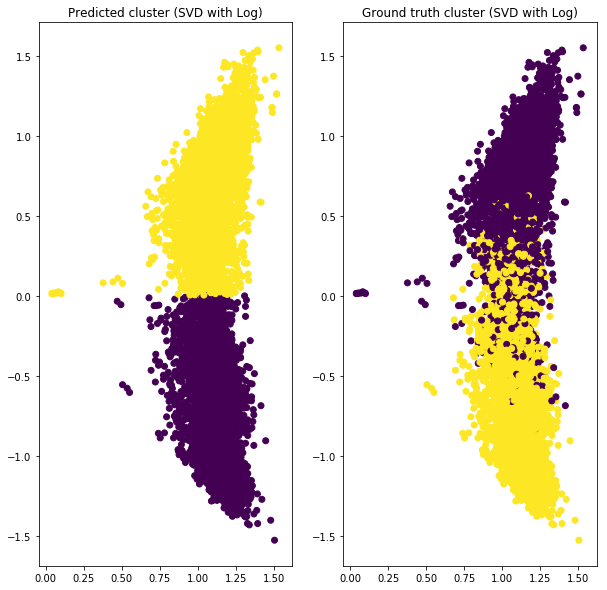

In [24]:
# apply transformation on data
X_log_svd = log_transform(data_svd_2)
km.fit(X_log_svd)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(X_log_svd[:, 0], X_log_svd[:, 1], c=km.labels_)
plt.title("Predicted cluster (SVD with Log)")

plt.subplot(122)
plt.scatter(X_log_svd[:, 0], X_log_svd[:, 1], c=label)
plt.title("Ground truth cluster (SVD with Log)")

print("The homogeneity score is:", 
      homogeneity_score(label, km.labels_))
print("The completeness_score score is:", 
      completeness_score(label, km.labels_))
print("The V-measure score is:", 
      v_measure_score(label, km.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(label, km.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(label, km.labels_))

### SVD (log+scaling)

The homogeneity score is: 0.6100178569004203
The completeness_score score is: 0.6099769451421393
The V-measure score is: 0.6099974003353047
The adjusted Rand Index score is: 0.716931707608509
The adjusted mutual information score is: 0.609941240817882


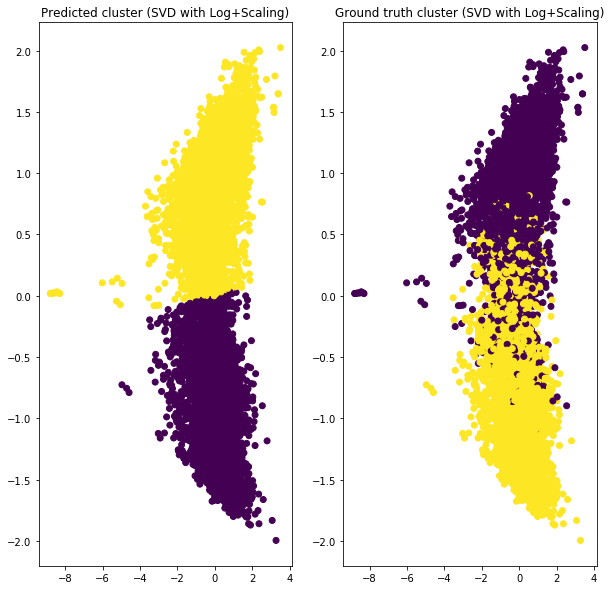

In [25]:
X_log_svd = log_transform(data_svd_2)
X_logScal_svd = scaler.fit_transform(X_log_svd)
km.fit(X_logScal_svd)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(X_logScal_svd[:, 0], X_logScal_svd[:, 1], c=km.labels_)
plt.title("Predicted cluster (SVD with Log+Scaling)")

plt.subplot(122)
plt.scatter(X_logScal_svd[:, 0], X_logScal_svd[:, 1], c=label)
plt.title("Ground truth cluster (SVD with Log+Scaling)")

print("The homogeneity score is:", 
      homogeneity_score(label, km.labels_))
print("The completeness_score score is:", 
      completeness_score(label, km.labels_))
print("The V-measure score is:", 
      v_measure_score(label, km.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(label, km.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(label, km.labels_))

### SVD (scaling + log)

The homogeneity score is: 7.413801393166482e-05
The completeness_score score is: 7.429862806673192e-05
The V-measure score is: 7.421823410387375e-05
The adjusted Rand Index score is: -1.3196858626130123e-05
The adjusted mutual information score is: -1.740554898676144e-05


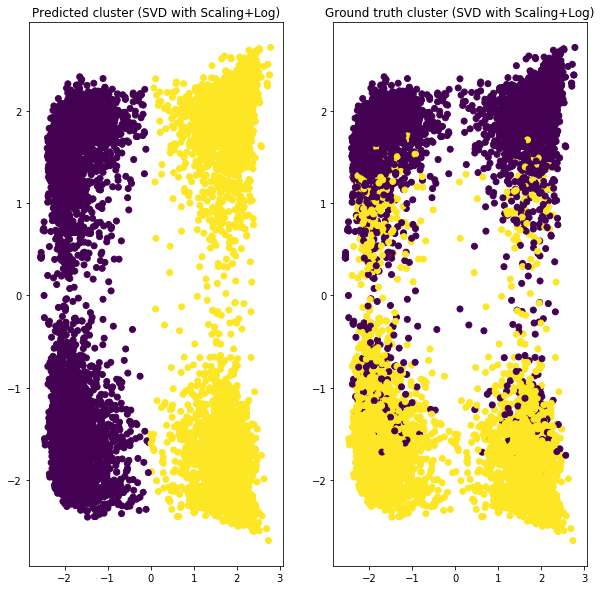

In [57]:
X_scal_svd = scaler.fit_transform(data_svd_2)
X_scaLog_svd = log_transform(X_scal_svd)
km.fit(X_scaLog_svd)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(X_scaLog_svd[:, 0], X_scaLog_svd[:, 1], c=km.labels_)
plt.title("Predicted cluster (SVD with Scaling+Log)")

plt.subplot(122)
plt.scatter(X_scaLog_svd[:, 0], X_scaLog_svd[:, 1], c=label)
plt.title("Ground truth cluster (SVD with Scaling+Log)")

print("The homogeneity score is:", 
      homogeneity_score(label, km.labels_))
print("The completeness_score score is:", 
      completeness_score(label, km.labels_))
print("The V-measure score is:", 
      v_measure_score(label, km.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(label, km.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(label, km.labels_))

### Logarithm NMF 

The homogeneity score is: 0.6757033916294439
The completeness_score score is: 0.6791388923298461
The V-measure score is: 0.6774167862456966
The adjusted Rand Index score is: 0.7649847921825073
The adjusted mutual information score is: 0.6756737021308169


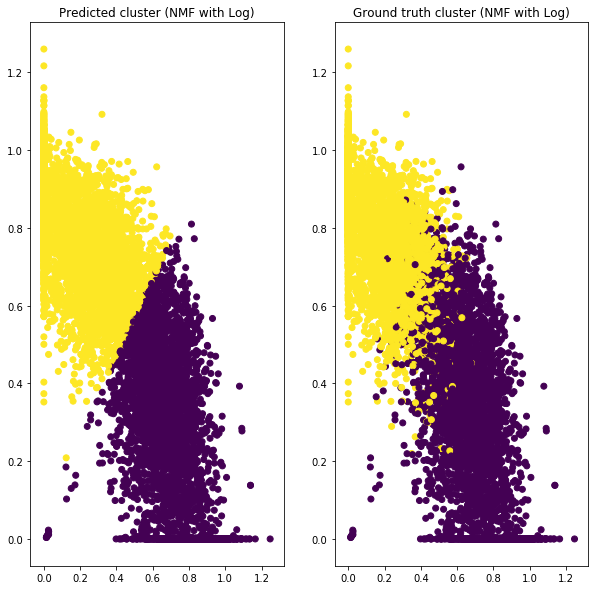

In [27]:
X_log_nmf = log_transform(data_nmf_2)
km.fit(X_log_nmf)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(X_log_nmf[:, 0], X_log_nmf[:, 1], c=km.labels_)
plt.title("Predicted cluster (NMF with Log)")

plt.subplot(122)
plt.scatter(X_log_nmf[:, 0], X_log_nmf[:, 1], c=label)
plt.title("Ground truth cluster (NMF with Log)")

print("The homogeneity score is:", 
      homogeneity_score(label, km.labels_))
print("The completeness_score score is:", 
      completeness_score(label, km.labels_))
print("The V-measure score is:", 
      v_measure_score(label, km.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(label, km.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(label, km.labels_))

### Scaling NMF

The homogeneity score is: 0.6828038321574016
The completeness_score score is: 0.6856459752144646
The V-measure score is: 0.6842219522524521
The adjusted Rand Index score is: 0.7734426774605906
The adjusted mutual information score is: 0.6827747927166996


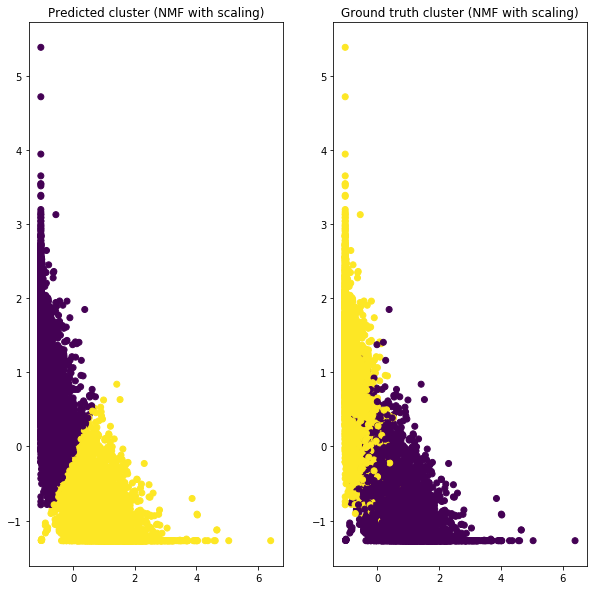

In [28]:
X_scal_nmf = scaler.fit_transform(data_nmf_2)
km.fit(X_scal_nmf)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(X_scal_nmf[:, 0], X_scal_nmf[:, 1], c=km.labels_)
plt.title("Predicted cluster (NMF with scaling)")

plt.subplot(122)
plt.scatter(X_scal_nmf[:, 0], X_scal_nmf[:, 1], c=label)
plt.title("Ground truth cluster (NMF with scaling)")

print("The homogeneity score is:", 
      homogeneity_score(label, km.labels_))
print("The completeness_score score is:", 
      completeness_score(label, km.labels_))
print("The V-measure score is:", 
      v_measure_score(label, km.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(label, km.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(label, km.labels_))

### NMF (Log + Scaling)

The homogeneity score is: 0.6863512458670784
The completeness_score score is: 0.6890551449829493
The V-measure score is: 0.6877005376394758
The adjusted Rand Index score is: 0.777017803240186
The adjusted mutual information score is: 0.686322531195829


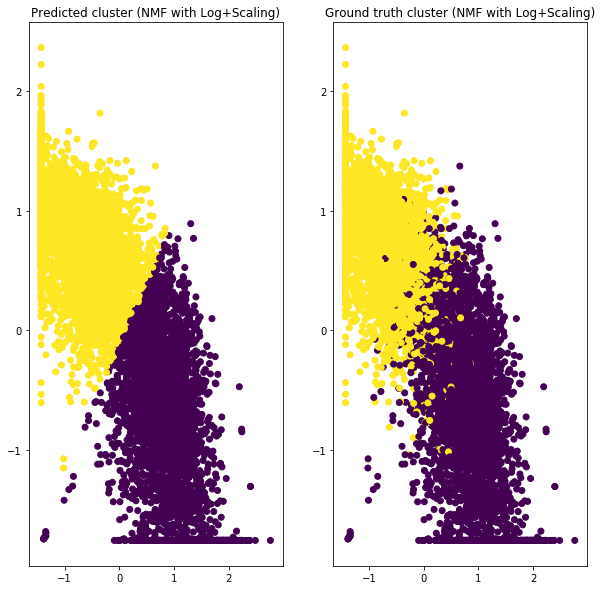

In [29]:
X_log_nmf = log_transform(data_nmf_2)
X_logScal_nmf = scaler.fit_transform(X_log_nmf)
km.fit(X_logScal_nmf)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(X_logScal_nmf[:, 0], X_logScal_nmf[:, 1], c=km.labels_)
plt.title("Predicted cluster (NMF with Log+Scaling)")

plt.subplot(122)
plt.scatter(X_logScal_nmf[:, 0], X_logScal_nmf[:, 1], c=label)
plt.title("Ground truth cluster (NMF with Log+Scaling)")

print("The homogeneity score is:", 
      homogeneity_score(label, km.labels_))
print("The completeness_score score is:", 
      completeness_score(label, km.labels_))
print("The V-measure score is:", 
      v_measure_score(label, km.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(label, km.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(label, km.labels_))

### NMF (Scaling + Log)

The homogeneity score is: 0.6955747304702337
The completeness_score score is: 0.6962558403229241
The V-measure score is: 0.6959151187417284
The adjusted Rand Index score is: 0.7927558723918019
The adjusted mutual information score is: 0.6955468602418302


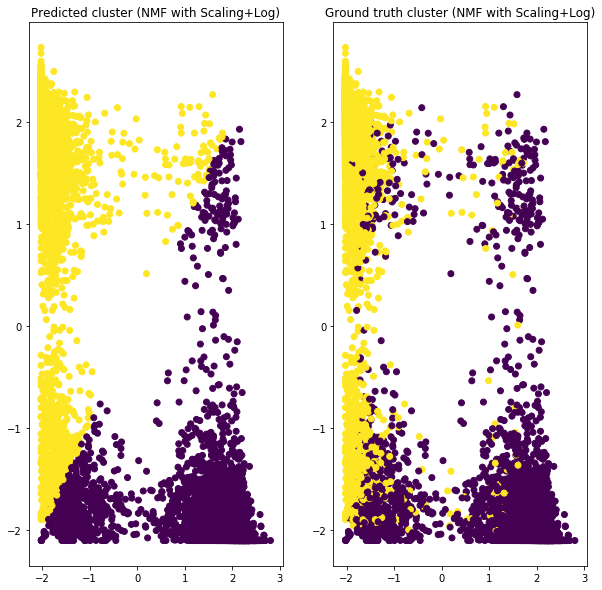

In [30]:
X_scal_nmf = scaler.fit_transform(data_nmf_2)
X_scaLog_nmf = log_transform(X_scal_nmf)
km.fit(X_scaLog_nmf)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(X_scaLog_nmf[:, 0], X_scaLog_nmf[:, 1], c=km.labels_)
plt.title("Predicted cluster (NMF with Scaling+Log)")

plt.subplot(122)
plt.scatter(X_scaLog_nmf[:, 0], X_scaLog_nmf[:, 1], c=label)
plt.title("Ground truth cluster (NMF with Scaling+Log)")

print("The homogeneity score is:", 
      homogeneity_score(label, km.labels_))
print("The completeness_score score is:", 
      completeness_score(label, km.labels_))
print("The V-measure score is:", 
      v_measure_score(label, km.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(label, km.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(label, km.labels_))

## Question 9:
Can you justify why the "logarithm transformation" may improve the clustering results?

## Question 11:
Repeat the following for 20 categories using the same parameters as in 2-class case:
- Transform corpus to TF-IDF matrix;
- Directly perform K-means and report the 5 measures and the contingency matrix;

In [31]:
# prepare data
np.random.seed(42)
import random
random.seed(42)
from sklearn.datasets import fetch_20newsgroups

dataset_all = fetch_20newsgroups(subset='all', 
shuffle=True, random_state=42)

In [32]:
# TF-IDF
vec = CountVectorizer(min_df=3,stop_words='english')
all_vec = vec.fit_transform(dataset_all.data)

tfidf = TfidfTransformer()
all_tfidf = tfidf.fit_transform(all_vec)

In [33]:
# apply K-means
km20 = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0)
km20.fit(all_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=20, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [34]:
# 5 measures and contingency matrix
print('The contigency matrix for 20 categories:')
print(contingency_matrix(dataset_all.target, km20.labels_))

print("The homogeneity score is:", 
      homogeneity_score(dataset_all.target, km20.labels_))
print("The completeness_score score is:", 
      completeness_score(dataset_all.target, km20.labels_))
print("The V-measure score is:", 
      v_measure_score(dataset_all.target, km20.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(dataset_all.target, km20.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(dataset_all.target, km20.labels_))

The contigency matrix for 20 categories:
[[ 57  40   0   1   5  84   0   0  83   1   0   0   2 401  36   9   0  80
    0   0]
 [ 82   0   1  16   1   1   2   0 241   0   0   4   1   3 525   0   0   0
    0  96]
 [ 33   0  18   2   0   0  11   0 126   0   2   2   0   0 206   0   0   0
    0 585]
 [ 25   0 230   7   1   0   5   0 175   0   0   5   0   0 437   0   3   0
    0  94]
 [ 25   0 103  10   0   0   1   0 372   0   0   3   0   1 437   0   0   0
    0  11]
 [ 86   0   1  25   0   0   2   0 143   3   0   4   0   1 569   0   0   0
    0 154]
 [  5   0  70   3  27   0   7   0 477   0   0  12   5   0 334   0  12   0
    0  23]
 [ 18   0   0   7 568   0   1   0 210   0   0   5   3   0 164  12   0   0
    0   2]
 [ 77   0   0  17 682   0   1   0 110   0   0  12   0   0  97   0   0   0
    0   0]
 [  2   0   0   2   0   0   1   0 312   0   0   2   4   1 171   0 499   0
    0   0]
 [  2   0   0   3   2   0   0   0 110   0   0  50   0   1  83   0 748   0
    0   0]
 [ 49   0   0   3   0   

## Question 12:
Try different dimensions for both truncated SVD and NMF dimensionality reduction techniques and the different transformations of the obtained feature vectors as outlined in above parts.

### SVD Truncation

In [35]:
# truncate data using svd
ranks = [1, 2, 3, 5, 10, 20, 50, 100, 300]
hs,cs,vs,ars,amis = [],[],[],[],[]
for rank in ranks:
    svd = TruncatedSVD(n_components=rank)
    all_svd_r = svd.fit_transform(all_tfidf)
    
    # apply k-means
    km20.fit(all_svd_r)
    
    # calculate 5 scores
    hs.append(homogeneity_score(dataset_all.target,km20.labels_))
    cs.append(completeness_score(dataset_all.target,km20.labels_))
    vs.append(v_measure_score(dataset_all.target,km20.labels_))
    ars.append(adjusted_rand_score(dataset_all.target,km20.labels_))
    amis.append(adjusted_mutual_info_score(dataset_all.target,km20.labels_))

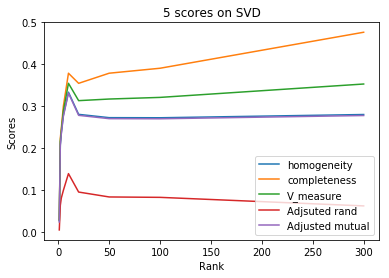

In [36]:
# plot 5 scores to find the best rank
plt.plot(ranks, hs)
plt.plot(ranks, cs)
plt.plot(ranks, vs)
plt.plot(ranks, ars)
plt.plot(ranks, amis)
plt.title('5 scores on SVD')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['homogeneity','completeness',
                     'V_measure','Adjsuted rand','Adjusted mutual'])

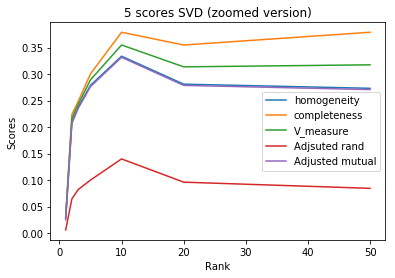

In [37]:
# plot within rank = 50
plt.plot(ranks[:7], hs[:7])
plt.plot(ranks[:7], cs[:7])
plt.plot(ranks[:7], vs[:7])
plt.plot(ranks[:7], ars[:7])
plt.plot(ranks[:7], amis[:7])
plt.title('5 scores SVD (zoomed version)')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['homogeneity','completeness',
                     'V_measure','Adjsuted rand','Adjusted mutual'])

### NMF Truncation

In [38]:
# process data using nmf
ranks = [1, 2, 3, 5, 10, 20, 50, 100, 300]
hs_nmf,cs_nmf,vs_nmf,ars_nmf,amis_nmf = [],[],[],[],[]
for rank in ranks:
    nmf = NMF(n_components=rank)
    all_nmf_r = nmf.fit_transform(all_tfidf)
    
    # apply k-means
    km20.fit(all_nmf_r)
    
    # calculate 5 scores
    hs_nmf.append(homogeneity_score(dataset_all.target,km20.labels_))
    cs_nmf.append(completeness_score(dataset_all.target,km20.labels_))
    vs_nmf.append(v_measure_score(dataset_all.target,km20.labels_))
    ars_nmf.append(adjusted_rand_score(dataset_all.target,km20.labels_))
    amis_nmf.append(adjusted_mutual_info_score(dataset_all.target,km20.labels_))

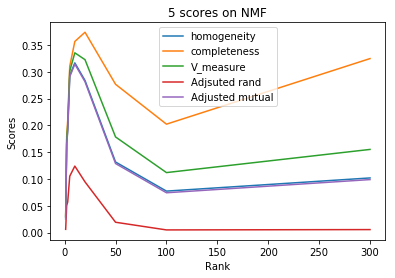

In [39]:
# plot 5 scores to find the best rank
plt.plot(ranks, hs_nmf)
plt.plot(ranks, cs_nmf)
plt.plot(ranks, vs_nmf)
plt.plot(ranks, ars_nmf)
plt.plot(ranks, amis_nmf)
plt.title('5 scores on NMF')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['homogeneity','completeness',
                     'V_measure','Adjsuted rand','Adjusted mutual'])

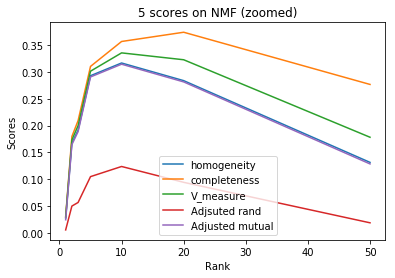

In [40]:
# plot within 20
plt.plot(ranks[:7], hs_nmf[:7])
plt.plot(ranks[:7], cs_nmf[:7])
plt.plot(ranks[:7], vs_nmf[:7])
plt.plot(ranks[:7], ars_nmf[:7])
plt.plot(ranks[:7], amis_nmf[:7])
plt.title('5 scores on NMF (zoomed)')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.legend(labels = ['homogeneity','completeness',
                     'V_measure','Adjsuted rand','Adjusted mutual'])

#### For both of the truncation method, it shows that rank 10 works best.

### Prepare for the best truncated data for both SVD & NMF

In [41]:
r = 10
svd_10 = TruncatedSVD(n_components=r)
nmf_10 = NMF(n_components=r)
all_svd_10 = svd_10.fit_transform(all_tfidf)
all_nmf_10 = nmf_10.fit_transform(all_tfidf)

In [42]:
km20

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=20, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

### SVD without transformation

In [51]:
km20.fit(all_svd_10)

print("The homogeneity score is:", 
      homogeneity_score(dataset_all.target, km20.labels_))
print("The completeness_score score is:", 
      completeness_score(dataset_all.target, km20.labels_))
print("The V-measure score is:", 
      v_measure_score(dataset_all.target, km20.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(dataset_all.target, km20.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(dataset_all.target, km20.labels_))

The homogeneity score is: 0.33410987330528147
The completeness_score score is: 0.37542857013519776
The V-measure score is: 0.35356616167218613
The adjusted Rand Index score is: 0.132759365181883
The adjusted mutual information score is: 0.3319470682085952


### NMF without transformation

In [52]:
km20.fit(all_nmf_10)

print("The homogeneity score is:", 
      homogeneity_score(dataset_all.target, km20.labels_))
print("The completeness_score score is:", 
      completeness_score(dataset_all.target, km20.labels_))
print("The V-measure score is:", 
      v_measure_score(dataset_all.target, km20.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(dataset_all.target, km20.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(dataset_all.target, km20.labels_))

The homogeneity score is: 0.31610912658305906
The completeness_score score is: 0.35636486691666597
The V-measure score is: 0.3350320991289351
The adjusted Rand Index score is: 0.12359992416407951
The adjusted mutual information score is: 0.3138861581515316


### Try different transformation on SVD truncation

### Scaling SVD

The homogeneity score is: 0.314998880833673
The completeness_score score is: 0.3553897455713576
The V-measure score is: 0.33397753990863766
The adjusted Rand Index score is: 0.12914175793421198
The adjusted mutual information score is: 0.31277222273889105


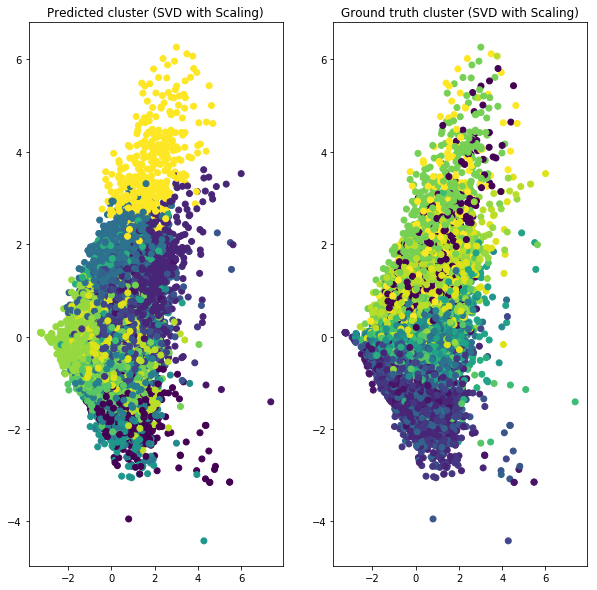

In [43]:
scaler = StandardScaler()
all_scal_svd = scaler.fit_transform(all_svd_10)
km20.fit(all_scal_svd)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(all_scal_svd[:, 0], all_scal_svd[:, 1], c=km20.labels_)
plt.title("Predicted cluster (SVD with Scaling)")

plt.subplot(122)
plt.scatter(all_scal_svd[:, 0], all_scal_svd[:, 1], c=dataset_all.target)
plt.title("Ground truth cluster (SVD with Scaling)")

print("The homogeneity score is:", 
      homogeneity_score(dataset_all.target, km20.labels_))
print("The completeness_score score is:", 
      completeness_score(dataset_all.target, km20.labels_))
print("The V-measure score is:", 
      v_measure_score(dataset_all.target, km20.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(dataset_all.target, km20.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(dataset_all.target, km20.labels_))

### Logarithm SVD

The homogeneity score is: 0.2349425836746665
The completeness_score score is: 0.2410347442232291
The V-measure score is: 0.23794967635649947
The adjusted Rand Index score is: 0.07906905820428448
The adjusted mutual information score is: 0.23247181429507022


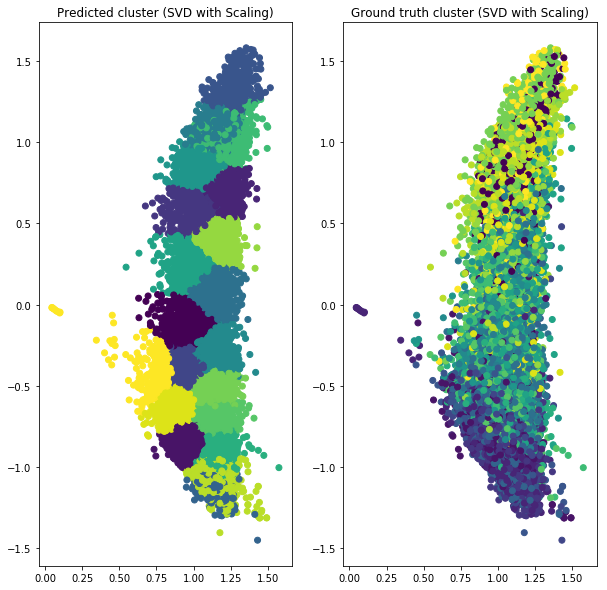

In [44]:
all_log_svd = log_transform(all_svd_10)
km20.fit(all_log_svd)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(all_log_svd[:, 0], all_log_svd[:, 1], c=km20.labels_)
plt.title("Predicted cluster (SVD with Log)")

plt.subplot(122)
plt.scatter(all_log_svd[:, 0], all_log_svd[:, 1], c=dataset_all.target)
plt.title("Ground truth cluster (SVD with Log)")

print("The homogeneity score is:", 
      homogeneity_score(dataset_all.target, km20.labels_))
print("The completeness_score score is:", 
      completeness_score(dataset_all.target, km20.labels_))
print("The V-measure score is:", 
      v_measure_score(dataset_all.target, km20.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(dataset_all.target, km20.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(dataset_all.target, km20.labels_))

### SVD (Log + Scaling)

The homogeneity score is: 0.3357412687867132
The completeness_score score is: 0.37569764294917135
The V-measure score is: 0.3545974257049343
The adjusted Rand Index score is: 0.14300938193002372
The adjusted mutual information score is: 0.3335824258795198


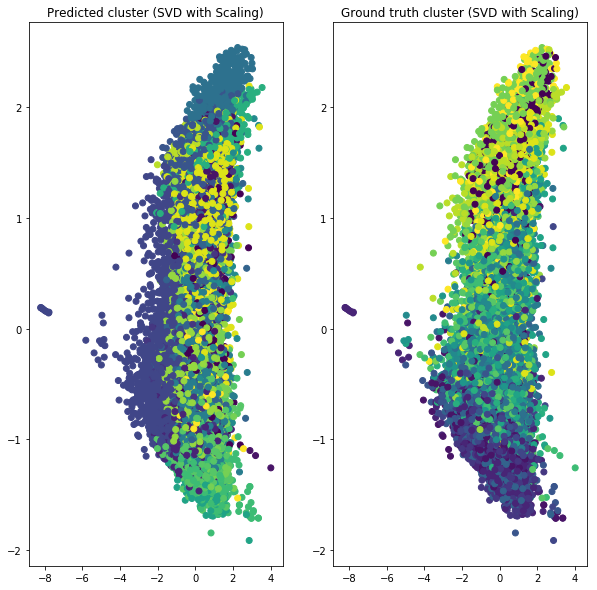

In [45]:
all_logScal_svd = scaler.fit_transform(all_log_svd)
km20.fit(all_logScal_svd)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(all_logScal_svd[:, 0], all_logScal_svd[:, 1], c=km20.labels_)
plt.title("Predicted cluster (SVD with Log+Scaling)")

plt.subplot(122)
plt.scatter(all_logScal_svd[:, 0], all_logScal_svd[:, 1], c=dataset_all.target)
plt.title("Ground truth cluster (SVD with Log+Scaling)")

print("The homogeneity score is:", 
      homogeneity_score(dataset_all.target, km20.labels_))
print("The completeness_score score is:", 
      completeness_score(dataset_all.target, km20.labels_))
print("The V-measure score is:", 
      v_measure_score(dataset_all.target, km20.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(dataset_all.target, km20.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(dataset_all.target, km20.labels_))

### SVD (Scaling + Log)

The homogeneity score is: 0.30027178767439244
The completeness_score score is: 0.32630906840407387
The V-measure score is: 0.31274944439664376
The adjusted Rand Index score is: 0.11422527002904437
The adjusted mutual information score is: 0.2980012903730434


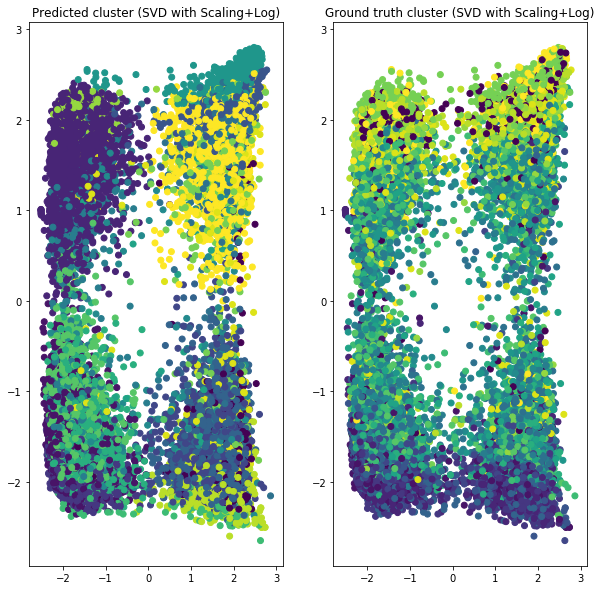

In [46]:
all_scaLog_svd = log_transform(all_scal_svd)
km20.fit(all_scaLog_svd)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(all_scaLog_svd[:, 0], all_scaLog_svd[:, 1], c=km20.labels_)
plt.title("Predicted cluster (SVD with Scaling+Log)")

plt.subplot(122)
plt.scatter(all_scaLog_svd[:, 0], all_scaLog_svd[:, 1], c=dataset_all.target)
plt.title("Ground truth cluster (SVD with Scaling+Log)")

print("The homogeneity score is:", 
      homogeneity_score(dataset_all.target, km20.labels_))
print("The completeness_score score is:", 
      completeness_score(dataset_all.target, km20.labels_))
print("The V-measure score is:", 
      v_measure_score(dataset_all.target, km20.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(dataset_all.target, km20.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(dataset_all.target, km20.labels_))

### Try different transformation on NMF truncation

### Scaling NMF

The homogeneity score is: 0.3147283144436645
The completeness_score score is: 0.35334206936180373
The V-measure score is: 0.33291927499860124
The adjusted Rand Index score is: 0.11769733241765228
The adjusted mutual information score is: 0.31250167821784586


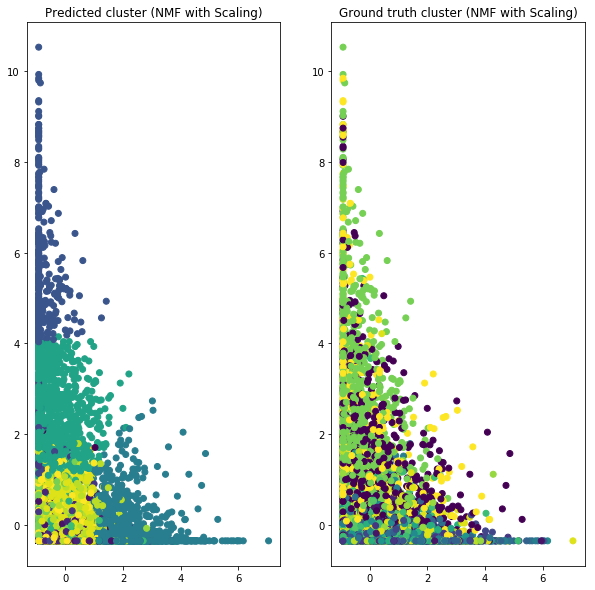

In [47]:
all_scal_nmf = scaler.fit_transform(all_nmf_10)
km20.fit(all_scal_nmf)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(all_scal_nmf[:, 0], all_scal_nmf[:, 1], c=km20.labels_)
plt.title("Predicted cluster (NMF with Scaling)")

plt.subplot(122)
plt.scatter(all_scal_nmf[:, 0], all_scal_nmf[:, 1], c=dataset_all.target)
plt.title("Ground truth cluster (NMF with Scaling)")

print("The homogeneity score is:", 
      homogeneity_score(dataset_all.target, km20.labels_))
print("The completeness_score score is:", 
      completeness_score(dataset_all.target, km20.labels_))
print("The V-measure score is:", 
      v_measure_score(dataset_all.target, km20.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(dataset_all.target, km20.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(dataset_all.target, km20.labels_))

### Logarithm NMF

The homogeneity score is: 0.1153490348784646
The completeness_score score is: 0.1298347648890275
The V-measure score is: 0.12216398341019047
The adjusted Rand Index score is: 0.027160625201597538
The adjusted mutual information score is: 0.11247543270082322


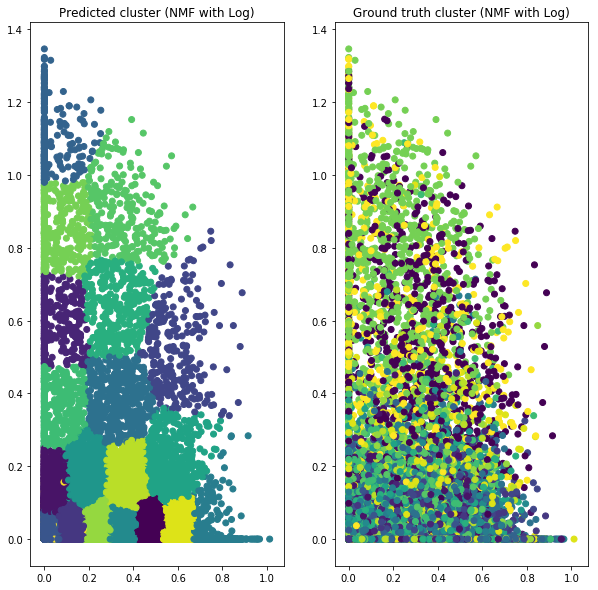

In [48]:
all_log_nmf = log_transform(all_nmf_10)
km20.fit(all_log_nmf)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(all_log_nmf[:, 0], all_log_nmf[:, 1], c=km20.labels_)
plt.title("Predicted cluster (NMF with Log)")

plt.subplot(122)
plt.scatter(all_log_nmf[:, 0], all_log_nmf[:, 1], c=dataset_all.target)
plt.title("Ground truth cluster (NMF with Log)")

print("The homogeneity score is:", 
      homogeneity_score(dataset_all.target, km20.labels_))
print("The completeness_score score is:", 
      completeness_score(dataset_all.target, km20.labels_))
print("The V-measure score is:", 
      v_measure_score(dataset_all.target, km20.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(dataset_all.target, km20.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(dataset_all.target, km20.labels_))

### NMF (Log +  Scaling)

The homogeneity score is: 0.33334157529325287
The completeness_score score is: 0.36912236594972203
The V-measure score is: 0.3503207032205325
The adjusted Rand Index score is: 0.1298407600502774
The adjusted mutual information score is: 0.3311759889708507


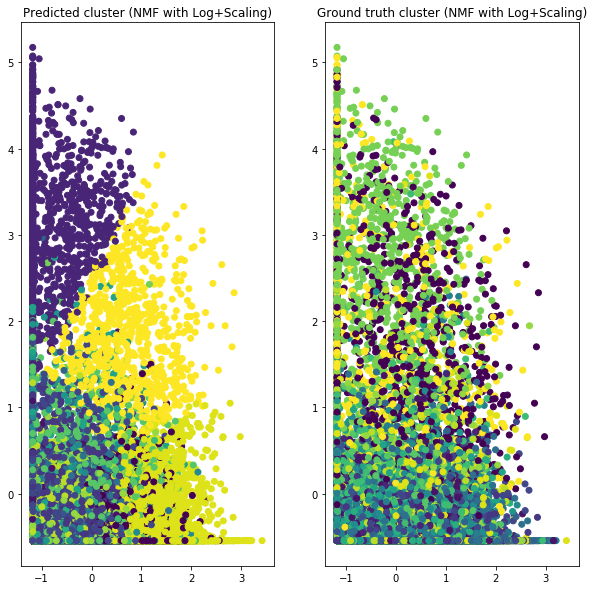

In [49]:
all_logScal_nmf = scaler.fit_transform(all_log_nmf)
km20.fit(all_logScal_nmf)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(all_logScal_nmf[:, 0], all_logScal_nmf[:, 1], c=km20.labels_)
plt.title("Predicted cluster (NMF with Log+Scaling)")

plt.subplot(122)
plt.scatter(all_logScal_nmf[:, 0], all_logScal_nmf[:, 1], c=dataset_all.target)
plt.title("Ground truth cluster (NMF with Log+Scaling)")

print("The homogeneity score is:", 
      homogeneity_score(dataset_all.target, km20.labels_))
print("The completeness_score score is:", 
      completeness_score(dataset_all.target, km20.labels_))
print("The V-measure score is:", 
      v_measure_score(dataset_all.target, km20.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(dataset_all.target, km20.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(dataset_all.target, km20.labels_))

### NMF (Scaling + Log)

The homogeneity score is: 0.30989530067771814
The completeness_score score is: 0.343960727863159
The V-measure score is: 0.3260406221851226
The adjusted Rand Index score is: 0.1275318604387618
The adjusted mutual information score is: 0.3076505725305563


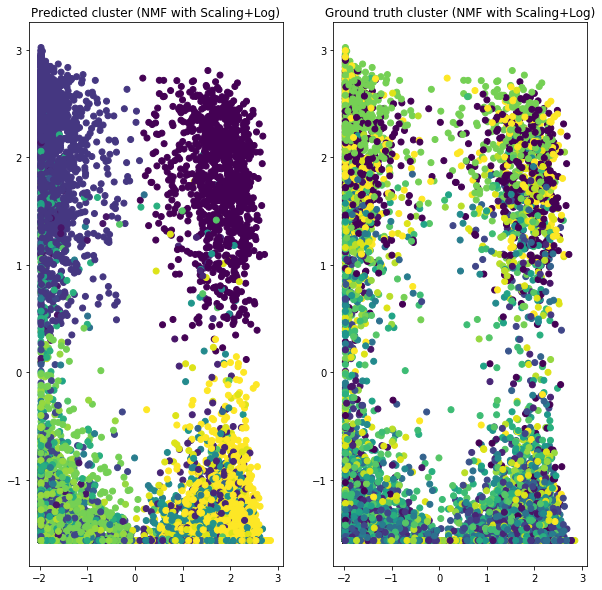

In [50]:
all_scaLog_nmf = log_transform(all_scal_nmf)
km20.fit(all_scaLog_nmf)

plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.scatter(all_scaLog_nmf[:, 0], all_scaLog_nmf[:, 1], c=km20.labels_)
plt.title("Predicted cluster (NMF with Scaling+Log)")

plt.subplot(122)
plt.scatter(all_scaLog_nmf[:, 0], all_scaLog_nmf[:, 1], c=dataset_all.target)
plt.title("Ground truth cluster (NMF with Scaling+Log)")

print("The homogeneity score is:", 
      homogeneity_score(dataset_all.target, km20.labels_))
print("The completeness_score score is:", 
      completeness_score(dataset_all.target, km20.labels_))
print("The V-measure score is:", 
      v_measure_score(dataset_all.target, km20.labels_))
print("The adjusted Rand Index score is:", 
      adjusted_rand_score(dataset_all.target, km20.labels_))
print("The adjusted mutual information score is:", 
      adjusted_mutual_info_score(dataset_all.target, km20.labels_))

#### As the results shown above, we could see that in each of the truncation method:
- SVD: Log+Scaling works best
- NMF: Log+Scaling works best

#### Using Log+Scaling transformation method, SVD is slightly better than NMF. 